# Lesson 6 - Introduction to Regression

## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression model attempts to predict the value of one variable, known as the **dependent variable**, **response variable**, or **label**, using the values of other variables, known as **independent variables**, **explanatory variables**, or **features**. Single regression has one label used to predict one feature. Multiple regression uses two of more feature variables. 

Virtually all machine learning models, including some of the latest deep learning methods, are a form of regression. These methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 

Linear regression is the foundational form of regression. To solve linear regression, normally the **method of least squares** is used.  Here, we are looking to find parameters of the function that minimizes the square of the error between the predictions, which are the function output and the observed target values.

## History

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Tobias_Mayer.jpg" title="Tobias Mayer" style="float:left; margin-right: 7px; height: 150px;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Pierre-Simon_Laplace.jpg" title="Pierre-Simon Laplace" style="float: right; margin-left: 10px; height: 150px;">
Regression is based on the method of least squares or the method of minimum mean square error. The ideas around least squares or averaging errors have occurred over nearly three centuries. The fist known publication of a 'Method of Averages' was by the German astronomer Tobias Mayer in 1750 (illustration top left). 

Laplace used a similar method which he published in 1788 (illustration top right).

<div style="clear: both;"></div>


<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Legendre.jpg" style="height: 150px; float: left; margin-right: 10px;" title="Caricature of Legendre - published method of least squares"><img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/Carl_Friedrich_Gauss.jpg" style="height: 150px; float: right; margin-left: 10px;" title="Carl Friedrich Gauss - early adopter of least squares">The first publication of the method or least squares was by the French mathematician Adrien-Marie Legendre in 1805 (middle left). 

It is very likely that the German physicist and mathematician Carl Friedrich Gauss (middle right) developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

<div style="clear: both;"></div>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/Francis_Galton.jpg" style="height: 150px; float: left; margin-right: 10px;" title="Francis Galton - inventor of regression">The first use of the term **regression** was by Francis Galton, a cousin of Charles Darwin, in 1886 (bottom left). Galton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. 


<img src="https://upload.wikimedia.org/wikipedia/commons/b/be/Karl_Pearson%3B_Sir_Francis_Galton.jpg" style="height: 350px; float: right; margin-left: 10px;" title="Karl Pearson(left) and Francis Galton(right)">
While Galton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today (Pearson and Galton, bottom right). 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models.

In this and subsequent sections, we will introduce and expand the concepts of linear regression and several methods associated with it.

## Introduction to Linear Regression

We will focus here on **linear models** which are foundational:
- Derived with linear algebra
- Basis of many machine learning models
- Understanding linear models is basis for understanding behavior of many statistical and ML models
- Basis of time series models

### Linear model of a straight line

Let's have a look at the simplest case of a regression model for a straight line. If we have one feature and one label, and there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

$$where\\
slope = m = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$


If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the figure below.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/LSRegression.jpg" alt="LS Regression" style="width: 450px;"/>
<center>**Example of Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of computationally efficient algorithms for finding minimums of equations.

### A first regression model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [1]:
import numpy as np
import pandas as pd

# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})
# Or alternatively:
# sim_data = pd.DataFrame(data=np.column_stack((x_data, y_data)), columns=['x','y'])

sim_data.head()

,x,y
0,0.000000,0.198829
1,0.204082,-1.390840
2,0.408163,2.108407
3,0.612245,1.211472
4,0.816327,0.796573


Next, you can visualize these data by executing the code in the cell below. Notice that nearly all the points  fall on a straight line.

Text(0.5, 1.0, 'x vs y')

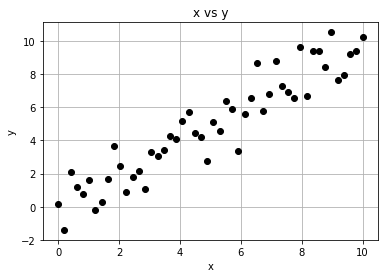

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sim_data['x'], sim_data['y'], 'ko')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

## Building a Model
Now, you are ready to build and evaluate the model using Python. Python has libraries that contain linear modeling capabilities.

The first python library that is popular for linear regression is `Scikit-learn`.  Scikit-learn is a library that has many different types of machine learning algorithms, but here we concern ourselves with the linear regression capabilities.

The second library is called `Stats-models`.  For those that have experience with the programming language, R, this library is the most similar because it provides easy statistical analysis of linear models that are fitted to the data.

To start, we will show how to use the library `Scikit-learn` for linear regression. Model creation in Scikit-learn generally has two steps, declaring the model formulation and then fitting the model.

In our case we only have one independent variable and one dependent variable. The code in the cell below does the following:  

- Computes the Python model object, `linear_model`, using the simple linear regression.
- Uses the model object to compute scores (predicted values) for the dependent variable `y`. In this case, we just use the data that was originally used to compute the model. In a more general case, you can use other data to make predictions from the model.
- Computes the residuals of the model.

Execute this code and examine the head of the data frame computed.

Intercept: -0.05485
Slope : 0.99291


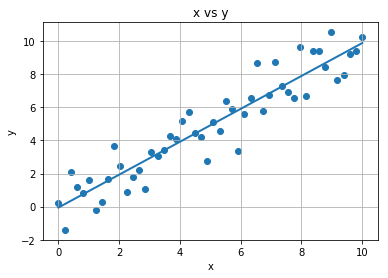

In [29]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
x_input = sim_data['x'].values.reshape(n_points, 1)
y_output = sim_data['y'].values.reshape(n_points, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

### Stats Model Package
Now we show how to fit a line with Stats Models package. The model declaration and fitting are in a different format as shown below.

In [4]:
import statsmodels.formula.api as sm

ols_model = sm.ols(formula = 'y ~ x', data=sim_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.x))

Intercept: -0.05485
Slope : 0.99291


In [5]:
# Add predicted to pandas dataframe
sim_data['predicted'] = y_pred
# Add residuals to pandas dataframe
sim_data['resids'] = y_output - y_pred

# View head of data frame
sim_data.head()

,x,y,predicted,resids
0,0.000000,0.198829,-0.054847,0.253676
1,0.204082,-1.390840,0.147789,-1.538628
2,0.408163,2.108407,0.350424,1.757982
3,0.612245,1.211472,0.553060,0.658412
4,0.816327,0.796573,0.755695,0.040877


In [6]:
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('m = {}'.format(m[0]))
print('b = {}'.format(b[0]))

m = 0.992914180541969
b = -0.05484678894477568


### Interpreting the Parameters!

It is very important to know how to interpret the parameters.  Here is an example for the above parameters. (Your results will be different because of the random seed used in creating the data.)

**Y Intercept**:  When x is zero, y is -0.53...
    
**Slope**:  When we increase x by 1 then we expect that y will go up by 1.07....

### Model Summary Statistics
The code in the cell below is fairly voluminous, but straightforward. In summary, the code computes summary statistics and makes diagnostic plots for ordinary linear models.

The Scikit-learn library is primarily made for fitting models and getting predictions. For linear regression, we are also interested in many diagnostic plots.  To get these plots easily, we can use a different library called `statsmodels`.

Intercept, Slope : Intercept   -0.054847
x            0.992914
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 427.5493798128219
SST: 486.92330023700987
SSR: 59.37392042418797
RMSE: 20.67726722303559
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     345.6
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           1.42e-23
Time:                        01:05:57   Log-Likelihood:                -75.243
No. Observations:                  50   AIC:                             154.5
Df Residuals:                      48   BIC:                             158.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
            

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

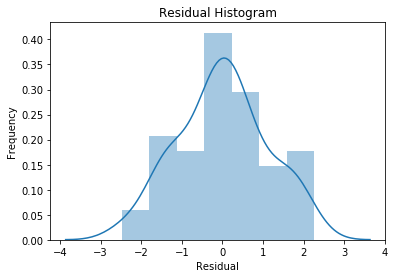

In [7]:
import statsmodels.formula.api as sm
import seaborn as sns

ols_model = sm.ols(formula = 'y ~ x', data=sim_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Your Turn 1
Create a regression model from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with a the error having a standard deviation of 5. Plot the result of your model. How does this slope and intercept of this model compare to the model from the data with a standard deviation of 1? 

**Hint:** You need need to add columns named `score` and `resids` to the data frame before you create the plots. 

In [8]:
# New Regression Model sd=5

# Replace the ??? with the correct parameters
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
reg_data_5 = pd.DataFrame({'x':x_data, 'y':y_data})

reg_data_5.head()

,x,y
0,0.000000,-3.638485
1,0.204082,0.835444
2,0.408163,12.648968
3,0.612245,2.206302
4,0.816327,5.716559


In [11]:
# replace the ??? with the correct parameters

# Switch to Stats Model Package
# Fit the model and get the linear model summaries/plots.
x5_input = reg_data_5['x']
y5_output = reg_data_5['y']
ols5_model = sm.ols(formula='y ~ x', data = reg_data_5) # Use a simple formula and the data generated above

results5 = ols5_model.fit()

# Get slope (m) and y-intercept (b)
results5.params

Intercept    0.994337
x            0.571324
dtype: float64


SSE, SST, SSR, and RMSE:
SSE: 141.55596179181543
SST: 1066.3793366450925
SSR: 924.8233748532771
RMSE: 11.897729270403469
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     7.347
Date:                Tue, 12 Feb 2019   Prob (F-statistic):            0.00929
Time:                        22:51:32   Log-Likelihood:                -143.89
No. Observations:                  50   AIC:                             291.8
Df Residuals:                      48   BIC:                             295.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

Text(0.5, 1.0, 'x vs y')

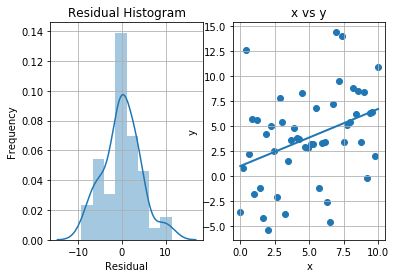

In [12]:
# replace the ??? with the correct parameters

# Additional Statistics
print('\nSSE, SST, SSR, and RMSE:')
mean5_y = np.mean(y5_output)
sst5 = np.sum((y5_output - mean5_y)**2)
sse5 = sst5 - results5.ssr
print('SSE: {}'.format(sse5))
print('SST: {}'.format(sst5))
print('SSR: {}'.format(results5.ssr))
print('RMSE: {}'.format(np.sqrt(results5.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5.summary())

# Plot a histogram of the residuals
y5_pred = ols5_model.fit().predict(x5_input)

plt.subplot(1, 2, 1)
sns.distplot(results5.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x5_input, y5_output)
plt.plot(x5_input, y5_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [13]:
# replace the ??? with the correct parameters

# Compare slope and intercept
print('sd=1 Intercept, Slope : \n{}'.format(results.params))
print('\nsd=5 Intercept, Slope : \n{}'.format(results5.params))

sd=1 Intercept, Slope : 
Intercept   -0.054847
x            0.992914
dtype: float64

sd=5 Intercept, Slope : 
Intercept    0.994337
x            0.571324
dtype: float64


# Evaluation of Regression Models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors.

If we want to know how well we did, we must consider what a good benchmark would be.  A common easy benchmark is to see if we can predict better than just the mean of the target variable.

If we define the following terms:

$\bar{Y}$ - The mean of the target values.

$Y_{i}$ - Target value of the i-th point.

$\hat{Y_{i}}$ - Predicted value of the i-th point.

Then we can define the following error metrics:

**Sum of Squared Residuals (SSR)**: This is the value that the method of least squares was able to minimize to with the best fit line.

SSR = $\sum \left( Y_{i} - \hat{Y_{i}} \right)^{2}$

**Sum of Squared Total (SST)**: This is a measure of how bad a prediction the target-mean would be.

SST = $\sum \left( Y_{i} - \bar{Y} \right)^{2}$

**Sum of Squared Error (SSE)**: This is a sum of a squared pointwise difference of the (SST - SSR).  You can also think of this as a measurement of how much better we are explaining the variation than the mean.

SSE = $\sum \left( \hat{Y_{i}} - \bar{Y} \right)^{2}$

It is the case that **SST = SSR + SSE**.

We also will be calculating something called the **Root-Mean-Squared-Error**, or the **RMSE**.  The reason we do this is because the Sum-squared-error (also known as the mean-squared error) is in units of x-squared.  To get a handle on understanding the error in units of 'x', we take the square root of the mean-squared-error , or the square root of the sum-square-error.  This is the RMSE.

---------------

The errors of a regression model can be visualized as shown in the figure below. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coefficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model that perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_{SSR} = n - k = SSR\ degrees\ of\ freedom\\
df_{SST} = n - 1 = SST\ degrees\ of\ freedom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coefficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

## Your Turn 2

Examine the performance metrics for the previous two regressions with sd=1 and sd=5. 
- How do SSE, SSR, SST, $R^2$, and RMSE compare?

**Hint**: Use `results.rsquared` to find the $R^2$. 

In [15]:
print(results.rsquared)
print(results5.rsquared)

0.8780630945463326
0.1327444718097791


results
SSE, SST, SSR, and RMSE:
SSE: 427.5493798128219
SST: 486.92330023700987
SSR: 59.37392042418797
RMSE: 20.67726722303559

results5
SSE, SST, SSR, and RMSE:
SSE: 141.55596179181543
SST: 1066.3793366450925
SSR: 924.8233748532771
RMSE: 11.897729270403469

results_scaled_x
Scaled: SSE, SST, SSR, and RMSE:
SSE: 427.5493798128219
SST: 486.92330023700987
SSR: 59.37392042418798
RMSE: 20.67726722303559

## Scaling Data

When performing regression with numeric variables you will almost **always scale the data**.  Scaling data is important not just for regression, but most other machine learning models. Some reasons to scale regression data include:

- The intercept may be a long way from the actual data. With scaled features, the intercept is at the center of the distribution. 
- Scaling prevents features with a large numerical range from overwhelming features with small numerical values. Numerical range is not an indicator of feature importance!
- Another important point (that applies more outside of linear regression) is that scaling data can also shift the data to be nearer to zero and spread out more evenly.  These type of data shifts allow certain algorithms (especially non-linear iterative algorithms to converge to a solution quicker).

There are several possible approaches to scaling data:
 - Scale the features or independent variables. This is the most common practice.
 - Scale the label or dependent variable.
 - Scale both, which is another common practice.
 
In this case, we will just scale the one feature. Execute the code in the cell below and examine the results. 

In [16]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
#
# scaled_x = (x - min(x))/(max(x) - min(x))
#
# Add scaled x to data frame
sim_data['x_scale'] = scale(sim_data['x'])

sim_data.head()

,x,y,predicted,resids,x_scale
0,0.000000,0.198829,-0.054847,0.253676,-1.697749
1,0.204082,-1.390840,0.147789,-1.538628,-1.628453
2,0.408163,2.108407,0.350424,1.757982,-1.559158
3,0.612245,1.211472,0.553060,0.658412,-1.489862
4,0.816327,0.796573,0.755695,0.040877,-1.420566


Notice that the new `x_scale` feature has some additional attributes. These attributes are used to scale new data on which you are making predictions. This model **will not work on unscaled** data. 

Run the code in the cell below to create and evaluate a regression model using the scaled data. 

Scaled: Intercept, Slope : Intercept    4.909724
x_scale      2.924207
dtype: float64
Scaled: Intercept t-value, Slope t-value: Intercept    31.215108
x_scale      18.591563
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.9097      0.157     31.215      0.000       4.593       5.226
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.9242      0.157     18.592      0.000       2.608       3.240

Scaled: SSE, SST, SSR, and RMSE:
SSE: 427.5493798128219
SST: 486.92330023700987
SSR: 59.

Text(0.5, 1.0, 'Scaled Residual Histogram')

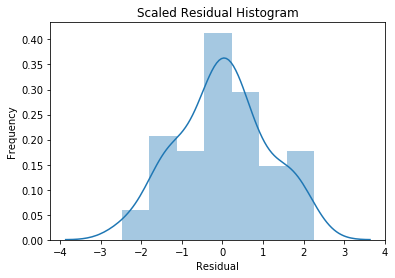

In [17]:
x_scaled = sim_data['x_scale']
ols_model = sm.ols(formula='y ~ x_scale', data = sim_data)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Scaled: Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([0,1]))

print('\nScaled: SSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Scaled Residual Histogram')

Examine these results and compare them to the results for the unscaled regression. Which performance statistics are the same and which are different?

## Your Turn 3

In the cell below use the data you created earlier (sd=5) to compute and evaluate a regression model using a scaled feature. 

How do the scaled values differ from the unscaled results?

In [18]:
# New scaled regression model, sd=5

# Replace the ??? with the correct parameters
# Get scaled x
scaled_x5_input = scale(x5_input)
reg_data_5['x_scaled'] = scaled_x5_input

# Fit the model and get the linear model summaries/plots.
ols5_model_scaled = sm.ols(formula='y ~ x_scaled', data = reg_data_5) # use the new scaled x in the formula

results5_scaled = ols5_model_scaled.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results5_scaled.params))

Intercept, Slope : Intercept    3.850959
x_scaled     1.682593
dtype: float64


In [19]:
# Print the first 5 entries of the data reg_data_5 dataframe
reg_data_5.head()

,x,y,x_scaled
0,0.000000,-3.638485,-1.697749
1,0.204082,0.835444,-1.628453
2,0.408163,12.648968,-1.559158
3,0.612245,2.206302,-1.489862
4,0.816327,5.716559,-1.420566


Intercept t-value, Slope t-value: Intercept    6.203618
x_scaled     2.710537
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.8510      0.621      6.204      0.000       2.603       5.099
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.6826      0.621      2.711      0.009       0.434       2.931

Scaled SSE, SST, SSR, and RMSE:
SSE: 141.55596179181543
SST: 1066.3793366450925
SSR: 924.8233748532771
RMSE: 11.897729270403469
                            OLS Regression Results      

Text(0.5, 1.0, 'x vs y (Scaled)')

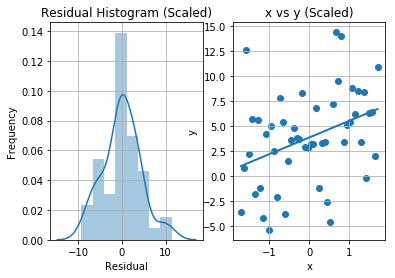

In [20]:
# Replace the ??? with the correct parameters

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results5_scaled.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results5_scaled.t_test([1,0]))
print('Intercept:')
print(results5_scaled.t_test([0,1]))

print('\nScaled SSE, SST, SSR, and RMSE:')
mean5_scaled_y = np.mean(y5_output)
sst5_scaled = np.sum((y5_output - mean5_scaled_y)**2)
sse5_scaled = sst5_scaled - results5_scaled.ssr
print('SSE: {}'.format(sse5_scaled))
print('SST: {}'.format(sst5_scaled))
print('SSR: {}'.format(results5_scaled.ssr))
print('RMSE: {}'.format(np.sqrt(results5_scaled.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5_scaled.summary())

# Plot a histogram of the residuals
y5_pred_scaled = ols5_model_scaled.fit().predict(scaled_x5_input)

plt.subplot(1, 2, 1)
sns.distplot(results5_scaled.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Scaled)')

plt.subplot(1, 2, 2)
plt.scatter(scaled_x5_input, y5_output)
plt.plot(scaled_x5_input, y5_pred_scaled, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Scaled)')

## Linear Regression Assumptions

At this point we should discuss a few key assumptions of linear regression. Keep these points in mind whenever you used these models. 

- There is a **linear relationship** between dependent variable and the **coefficients** of the independent variables.
- Measurement error is independent and random. Technically, we say that the error is **independently and identically distributed, or iid**.
- Errors arise from the dependent variable only.
- There is no multicolinearity. In other words, there is no significant correlation between the independent variables.
- Residuals are **homoscedastic** (constant variance).  In other words, the errors are the same across all groups of independent variables. The opposite of homoscedastic is **heteroscedastic**, where there is systematic variation in the residuals with label values.

The diagram below illustrates the iid errors for the dependent variable only.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/IndependentErrors.jpg" style="height: 350px;" alt="Independent errors" />

## Homoscedastic and Heteroscedastic Errors

Let's elaborate on some of the assumptions for the linear model. 

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = N(0, \sigma)$$

In this model the errors, $\epsilon_i$, do not depend on the dependent variable `y`. In this case we say the errors are **homoscedastic**.

But what if:

$$\epsilon_i = N(0, f(x_i))\\
such\ as\\
\epsilon_i = N(0, e^{x_i})$$

These errors are now **heteroscedastic**, with the errors dependent on `x` and hence not constant in `y`.

Let's look at an example. In the code below the error increases linearly as `x` increases. Run this code and examine the result.

In [21]:
# Parameters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
# Now add heteroscedasticity to y_error
y_error = y_error * np.linspace(0, 10, n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
het_data = pd.DataFrame({'x':x_data, 'y':y_data})

het_data.head()

#mod.het = lm(y ~ x, data = reg.data.het)
#reg.data.het = reg.data.het
#reg.data.het$score <- predict(mod.het, data = reg.data.het)
#reg.data.het$resids <- reg.data.het$y - reg.data.het$score
#plot.regression(reg.data.het, mod.het, k = 2)
#summary(mod.het)
#plot(mod.het)

,x,y
0,0.000000,0.000000
1,0.204082,-0.109199
2,0.408163,2.288391
3,0.612245,0.738936
4,0.816327,-4.071105


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6028
Date:                Wed, 13 Feb 2019   Prob (F-statistic):              0.441
Time:                        22:26:04   Log-Likelihood:                -238.24
No. Observations:                  50   AIC:                             480.5
Df Residuals:                      48   BIC:                             484.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6816      8.073     -0.332      0.7

Text(0.5, 1.0, 'x vs y (Heteroscedastic Error)')

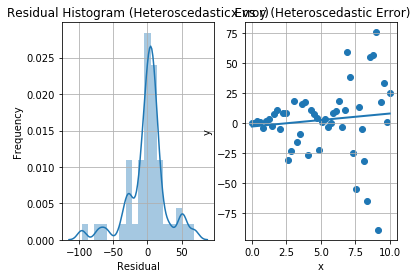

In [22]:
# Fit linear model and plot results/summaries
het_linear = sm.ols(formula = 'y ~ x', data = het_data).fit()

# Get most of the linear regression statistics we are interested in:
print(het_linear.summary())

# Plot a histogram of the residuals
y5_pred_het = het_linear.predict(het_data['x'])

plt.subplot(1, 2, 1)
sns.distplot(het_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Heteroscedastic Error)')

plt.subplot(1, 2, 2)
plt.scatter(het_data['x'], het_data['y'])
plt.plot(het_data['x'], y5_pred_het, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Heteroscedastic Error)')

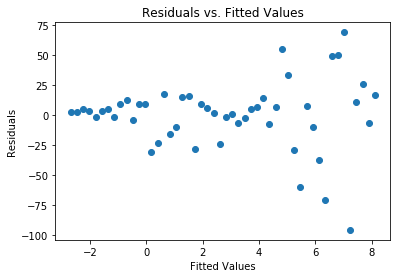

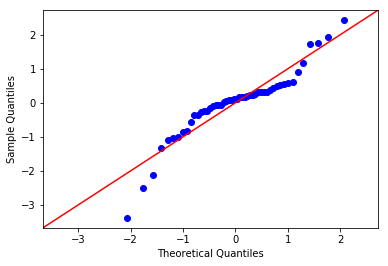

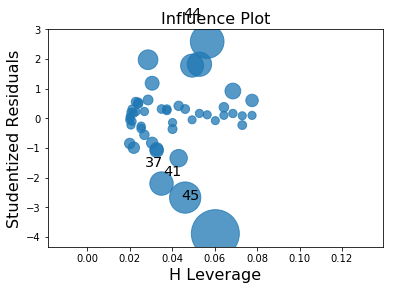

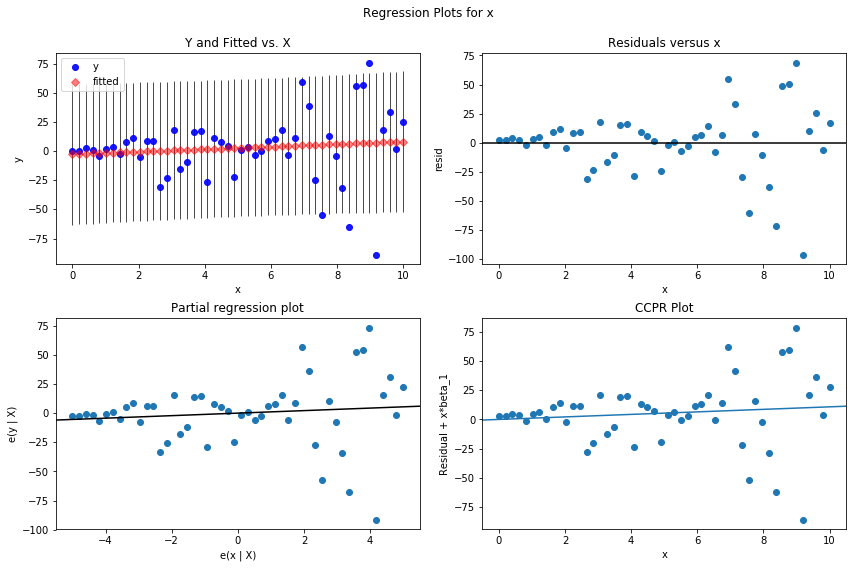

In [23]:
# Summary graphs:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = het_linear.resid
fitted_vals = het_linear.predict(het_data['x'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (het_linear.resid - np.min(het_linear.resid)) / np.max(het_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(het_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(het_linear, "x", fig=fig)

Notice the following about these results, which violate the homoscedastic error assumption:

- The plot of residuals vs. the predicted value shows a systematic increase from left to right.
- The Q-Q plot and the histogram show that the distribution of residuals has heavy tails and deviates from normal.
- The plot of the standardized residuals shows an increase from right to left on the plot.

***
# Linear Regressions are Not Just for Straight Lines

A linear model is linear in its coefficients, but that does not mean we are limited to straight lines, **a common misconception**.  In fact, a linear model need only be linear in its coefficients. A **non-comprehensive** list of functions which can be included in a linear model includes:

- Polynomials, but beware of polynomials of degree 3 or above.
- Splines and smoothing kernels.
- Trigonometric functions.
- Logarithmic and exponential functions.
- Interaction terms, which are the product of feature values. For example, the two-way interaction of `var1` and `var2` is specified at `var1:var2`, or `var1*var2`. Adding a third variable, `var3` the three-way interaction, including all two-way interactions is modeled as `var1:var2:var3`. 

## Polynomial Curve
To clarify these concepts, let's look at an example. The code in the cell below computes a curved line using a second order polynomial with coefficients `c1 and c2` and adds normally distributed noise.  Notice that the polynomial is defined by a linear sum of the components, defined by the coefficients. **Pay attention to the scaling of the features.** Run this code and have a look at the head of the data frame.

In [24]:
def sim_data_poly(x1, y1, x2, y2, c1=1.0, c2=0.5, n=50, sd=3):
    # Create x-sequence
    x_data = np.linspace(x1, x2, n)
    # Create y-sequence
    y_data = np.linspace(y1, y2, n)
    # Create curved y-data
    error = np.random.normal(loc=0, scale=sd, size=n)
    y_curved = c1 * y_data + c2 * y_data**2 + error
    # Scale x:
    x_scaled = scale(x_data)
    # Create pandas dataframe
    df = pd.DataFrame({'x': x_scaled,
                       'y': y_curved})
    return(df)

reg_data_poly = sim_data_poly(0, 0, 10, 10, n=50, sd=3)

reg_data_poly.head()

,x,y
0,-1.697749,-2.897632
1,-1.628453,-0.951598
2,-1.559158,0.224660
3,-1.489862,0.610094
4,-1.420566,1.702967


### Linear Polynomial Model
Next, you will compute a linear polynomial model for these data. The code in the  cell below uses the `I()` function which literally **Interprets** the argument. In this case `I(x^2)` is interpreted as the second order polynomial term. Run this code and examine the results. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1298.
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           7.46e-42
Time:                        22:38:03   Log-Likelihood:                -115.35
No. Observations:                  50   AIC:                             236.7
Df Residuals:                      47   BIC:                             242.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0158      0.532     31.989      0.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'x vs y (Polynomial)')

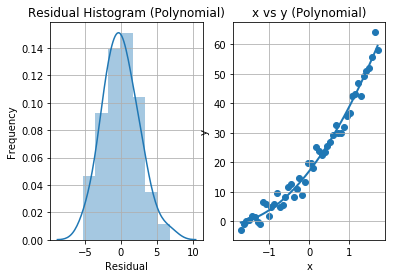

In [25]:
mod_poly = sm.ols(formula = 'y ~ x + I(x**2)', data = reg_data_poly).fit()

# Get most of the linear regression statistics we are interested in:
print(mod_poly.summary())

# Plot a histogram of the residuals
y5_pred_poly = mod_poly.predict(reg_data_poly['x'])

plt.subplot(1, 2, 1)
sns.distplot(mod_poly.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Polynomial)')

plt.subplot(1, 2, 2)
plt.scatter(reg_data_poly['x'], reg_data_poly['y'])
plt.plot(reg_data_poly['x'], y5_pred_poly, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Polynomial)')

### Interpreting Results
There is quite a bit of new information both plotted and in the tables. Let's step through what all this means.

- The plot of the data and the regression line: look at this plot and try to decide if the fit is reasonably good.
- The histogram of the residuals: do these residuals appear to be close to normally distributed?

The statistics we have already discussed.
- The report from the `summary` method.
  - The model formula
  - Summary statistics of the residuals
  - For each model coefficient, 1) the value of the coefficient, 2) the standard error of the coefficient, 3) the t statistic for the coefficient, and 4) the p-value of the coefficient. The null hypothesis for the coefficient is that it is 0, and not contributing to the model.
  - The standard error of the residuals, defined as:
$$rse = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{df} = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{N - k}\\
where\\
k = number\ of\ model\ parameters
$$
  - $R^2$ and $R^2_{adj}$.
  - The F statistic and p-value for the model. The null hypothesis is that the model is not explaining the data, or that the distribution of residuals is the same as the distribution of the original data. 

### Plotting Polynomial Residuals

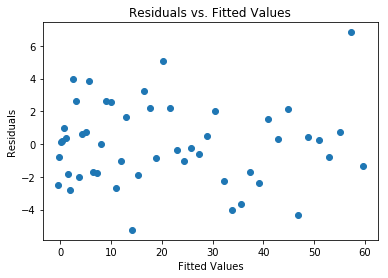

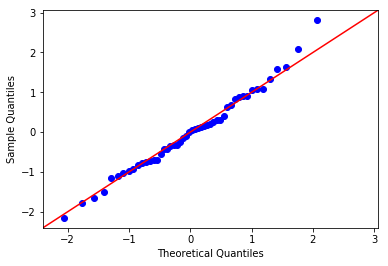

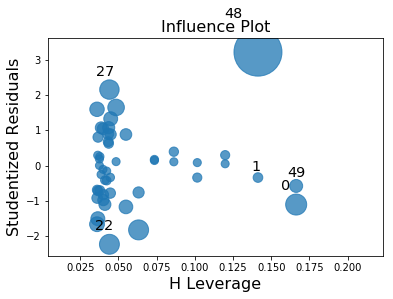

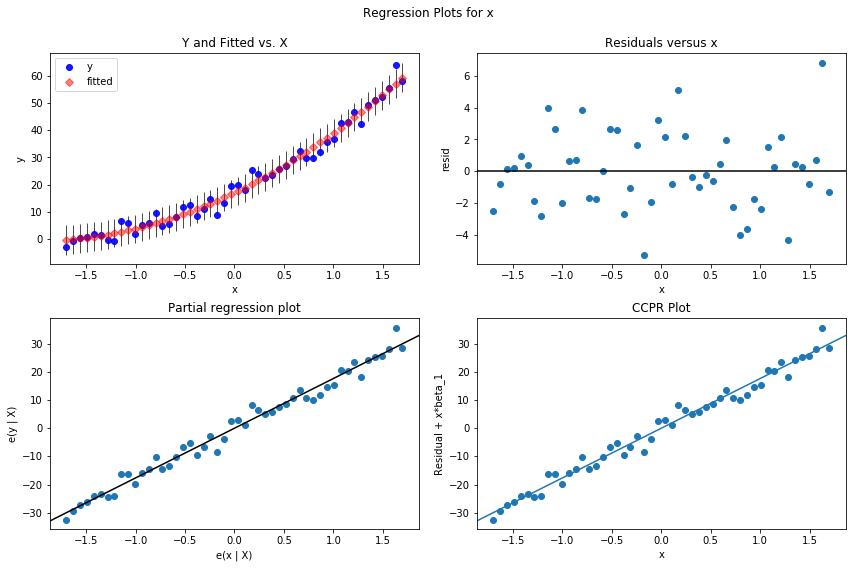

In [26]:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = mod_poly.resid
fitted_vals = mod_poly.predict(reg_data_poly['x'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (mod_poly.resid - np.min(mod_poly.resid)) / np.max(mod_poly.resid)

# Leverage Plot (Cook's Distance)
influence_plot(mod_poly)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(mod_poly, "x", fig=fig)

### Interpreting More Results
- A plot of fitted values (y in this case) vs. the residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values. 
- A Q-Q Normal plot of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values vs. the square root of the standardized residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values and should be in the range $0 \le \sqrt{stdresid} \le 1.5$ standard deviations. 

- A leverage plot showing Cooks distance. More on this later.

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreme they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence, all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{n (p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, Cook's distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

In [ ]:
sim_data.head()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     345.6
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           1.42e-23
Time:                        23:44:48   Log-Likelihood:                -75.243
No. Observations:                  50   AIC:                             154.5
Df Residuals:                      48   BIC:                             158.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9097      0.157     31.215      0.0

Text(0.5, 1.0, 'x vs y (With 1 Outlier)')

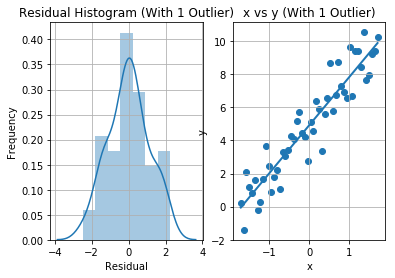

In [27]:
# Create new copy of original linear data
outlier_data = sim_data[['x', 'y']].copy()
# Add an outlier row
outlier = pd.DataFrame([[0.0, 20.0]], columns = ['x', 'y'])
outlier_data.append(outlier, ignore_index=True)

# Scale data
outlier_data['x_scaled'] = scale(outlier_data['x'])

# Fit linear model
outlier_linear = sm.ols(formula = 'y ~ x_scaled', data = outlier_data).fit()

# Get most of the linear regression statistics we are interested in:
print(outlier_linear.summary())

# Plot a histogram of the residuals
y_outlier = outlier_linear.predict(outlier_data['x_scaled'])

plt.subplot(1, 2, 1)
sns.distplot(outlier_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (With 1 Outlier)')

plt.subplot(1, 2, 2)
plt.scatter(outlier_data['x_scaled'], outlier_data['y'])
plt.plot(outlier_data['x_scaled'], y_outlier, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (With 1 Outlier)')

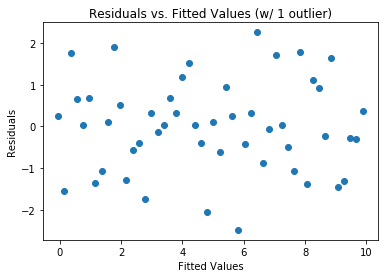

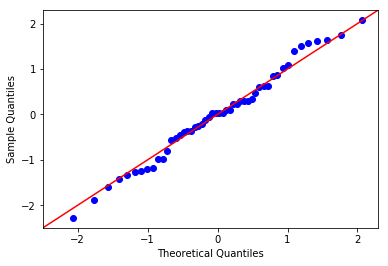

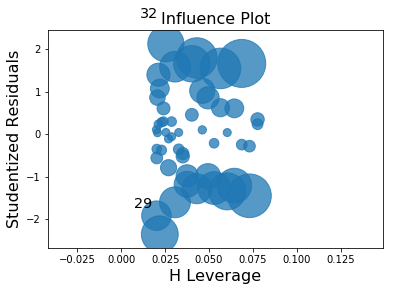

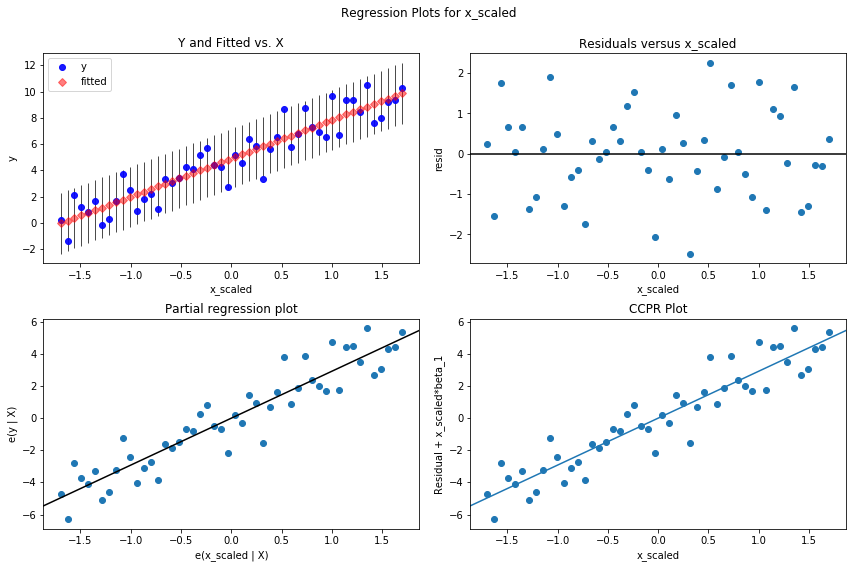

In [28]:
# Get Linear Regression Summary Plots
# Summary graphs:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = outlier_linear.resid
fitted_vals = outlier_linear.predict(outlier_data['x_scaled'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (w/ 1 outlier)')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (outlier_linear.resid - np.min(outlier_linear.resid)) / np.max(outlier_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(outlier_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(outlier_linear, "x_scaled", fig=fig)

## Summary
We looked at a lot of Regression concepts in this lesson so far:

- Single regression equation of a line is $y_i = mx_i + b + \epsilon_i $
- Use the Python model object `linear_model.LinearRegression()` to initialize the model
- Use the `fit` method to fit the model to the data
- Use `predict` method to compute scores(predict values) for the dependent value $y$
- Pull the model parameters $m$ (slope) with `coef` and $b$ (y-intercept) with `intercept`
- The residuals are the difference between the y_output and the y_predicted

- Use the `statsmodels` and `seaborn` libraries to get summary statistics and make diagnostic plots
- `sm.ols(formula = 'y ~ x', data=sim_data)` and `fit()` method to get the results

Evaluate the results from the OLS Regression Results with `summary` method
- SSR the Sum of the Squared Residuals is the difference in error from the regression line (try to minimize)
- SST the Sum of the Squared Total is the difference to the target mean
- SSE the Sum of the Squared Error is the variation of the regression line to the mean
- RMSE Root Mean Squared Error is the square root of the SSE
- $R^2$ is the fraction of the variance of the original data explained by the model, want a number close to 1

We created a function to scale data reconstructing the mean standardization.

<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
